<a href="https://colab.research.google.com/github/ilyayath/Credit-Risk-Analysis/blob/main/eda_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('/content/default of credit card clients.xls', header=1)

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


In [7]:
df['default payment next month'].value_counts(normalize=True)

,proportion
default payment next month,
0,0.7788
1,0.2212


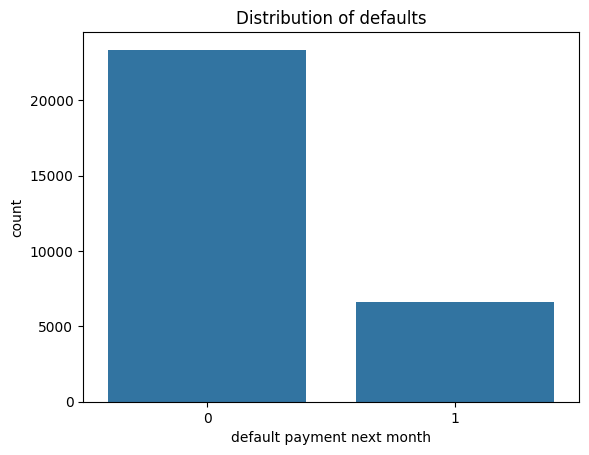

In [8]:
sns.countplot(x='default payment next month',data=df)
plt.title('Distribution of defaults')
plt.show()

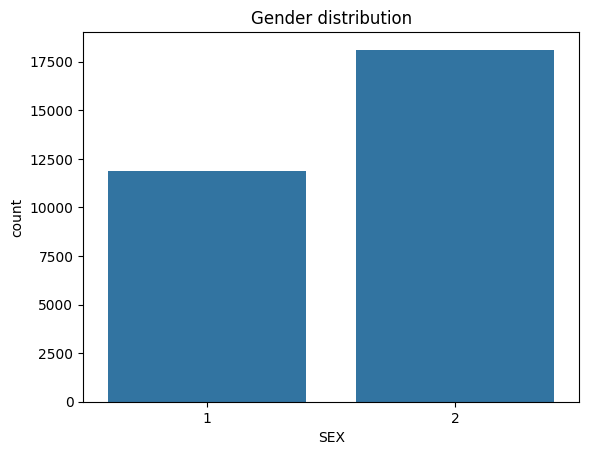

In [9]:
sns.countplot(x='SEX',data=df)
plt.title('Gender distribution')
plt.show()

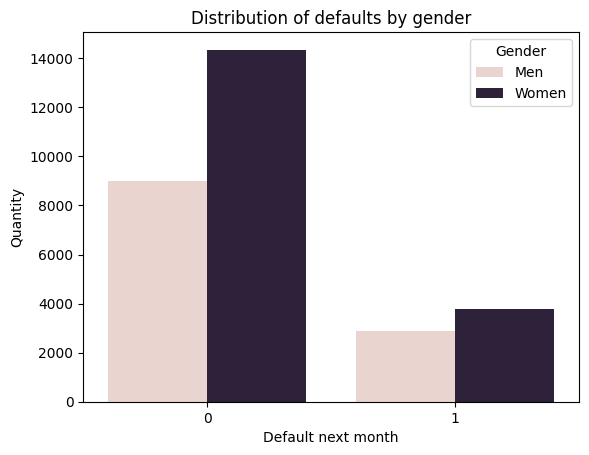

In [10]:
sns.countplot(x='default payment next month', hue='SEX', data=df)
plt.title('Distribution of defaults by gender')
plt.xlabel('Default next month')
plt.ylabel('Quantity')
plt.legend(title='Gender', labels=['Men', 'Women'])
plt.show()

In [11]:
total_mens = df[df['SEX'] == 1].shape[0]
def_mens = df[(df['SEX'] == 1) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of men who are late with payments {(def_mens/total_mens)*100}')

percentage of men who are late with payments 24.16722745625841


In [12]:
total_woman = df[df['SEX'] == 2].shape[0]
def_woman = df[(df['SEX'] == 2) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of woman who are late with payments {(def_woman/total_woman)*100}')

percentage of woman who are late with payments 20.776280918727917


Men are more likely to delay payments

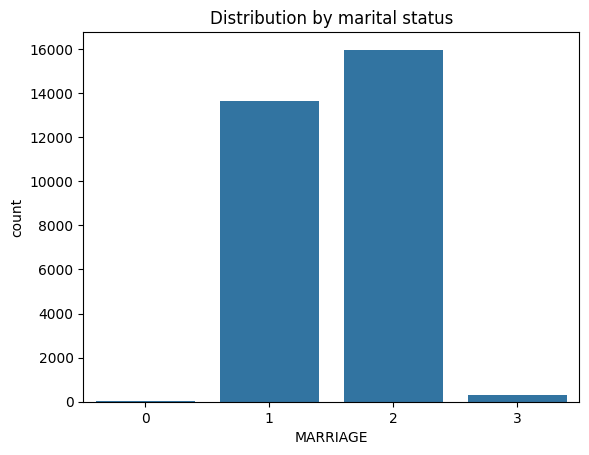

In [13]:
sns.countplot(x='MARRIAGE',data=df)
plt.title('Distribution by marital status')
plt.show()

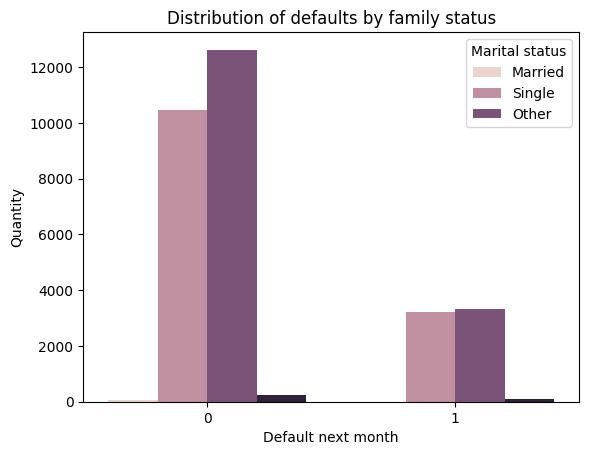

In [14]:
sns.countplot(x='default payment next month', hue='MARRIAGE', data=df)
plt.title('Distribution of defaults by family status')
plt.xlabel('Default next month')
plt.ylabel('Quantity')
plt.legend(title='Marital status', labels=['Married', 'Single','Other'])
plt.show()

In [15]:
total_married = df[df['MARRIAGE'] == 1].shape[0]
def_married = df[(df['MARRIAGE'] == 1) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of married who are late with payments {(def_married/total_married)*100}')

percentage of married who are late with payments 23.471703638626547


In [16]:
total_single = df[df['MARRIAGE'] == 2].shape[0]
def_single = df[(df['MARRIAGE'] == 2) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of single who are late with payments {(def_single/total_single)*100}')

percentage of single who are late with payments 20.928338762214985


Married are more likely to delay payments

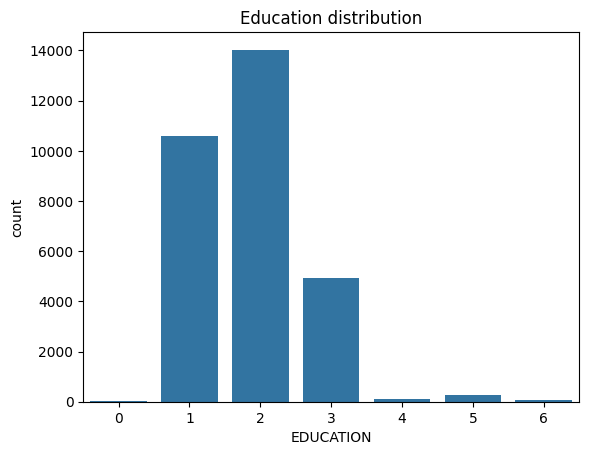

In [17]:
sns.countplot(x='EDUCATION',data=df)
plt.title('Education distribution')
plt.show()

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

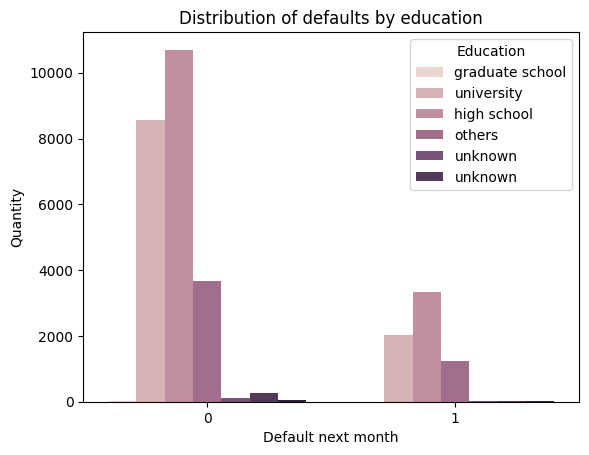

In [18]:
sns.countplot(x='default payment next month', hue='EDUCATION', data=df)
plt.title('Distribution of defaults by education')
plt.xlabel('Default next month')
plt.ylabel('Quantity')
plt.legend(title='Education', labels=['graduate school', 'university', 'high school', 'others', 'unknown', 'unknown'])
plt.show()

In [19]:
total_graduate = df[df['EDUCATION'] == 1].shape[0]
def_graduate = df[(df['EDUCATION'] == 1) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of graduate who are late with payments {(def_graduate/total_graduate)*100}')

percentage of graduate who are late with payments 19.23476617855456


In [20]:
total_uni = df[df['EDUCATION'] == 2].shape[0]
def_uni = df[(df['EDUCATION'] == 2) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of UNI who are late with payments {(def_uni/total_uni)*100}')

percentage of UNI who are late with payments 23.734853884533145


In [21]:
total_high_sch = df[df['EDUCATION'] == 3].shape[0]
def_high_sch = df[(df['EDUCATION'] == 3) & (df['default payment next month'] == 1)].shape[0]
print(f'percentage of High schoolers  who are late with payments {(def_high_sch/total_high_sch)*100}')

percentage of High schoolers  who are late with payments 25.15761643278422


High schoolers are more likely to delay payments

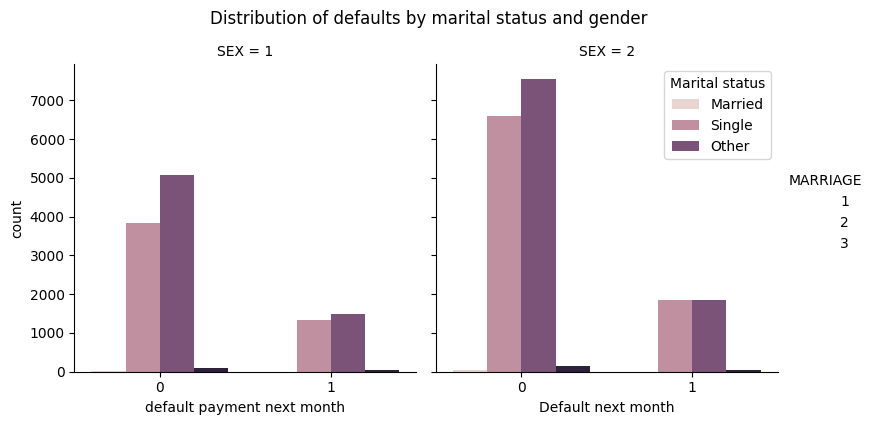

In [22]:
sns.catplot(x='default payment next month', hue='MARRIAGE', col='SEX',
            data=df, kind='count', height=4, aspect=1,
            hue_order=[1, 2, 3], col_order=[1, 2])
plt.suptitle('Distribution of defaults by marital status and gender', y=1.05)
plt.xlabel('Default next month')
plt.ylabel('Quantity')

plt.legend(title='Marital status', labels=['Married', 'Single', 'Other'])
plt.show()

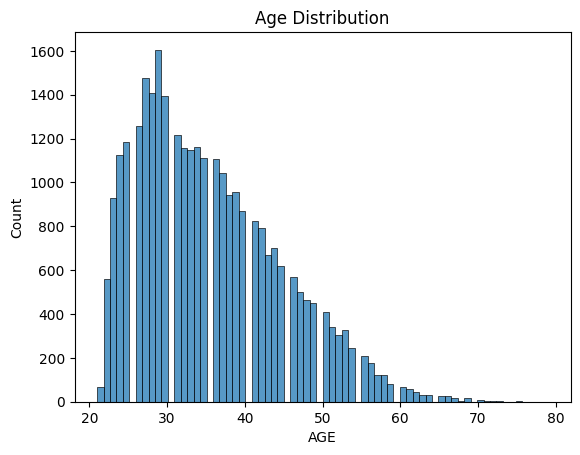

In [23]:
sns.histplot(data=df, x="AGE")
plt.title('Age Distribution')
plt.show()

In [24]:
pd.cut(df['AGE'], bins=4).unique()

[(20.942, 35.5], (35.5, 50.0], (50.0, 64.5], (64.5, 79.0]]
Categories (4, interval[float64, right]): [(20.942, 35.5] < (35.5, 50.0] < (50.0, 64.5] <
                                           (64.5, 79.0]]

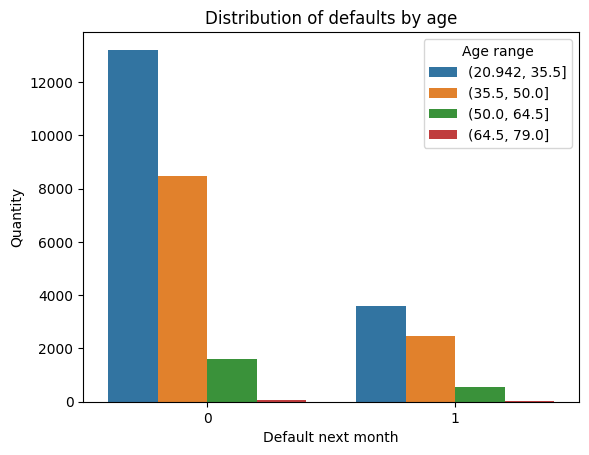

In [25]:
sns.countplot(x='default payment next month', hue=pd.cut(df['AGE'], bins=4), data=df)
plt.title('Distribution of defaults by age')
plt.xlabel('Default next month')
plt.ylabel('Quantity')
plt.legend(title='Age range', labels=['(20.942, 35.5]', '(35.5, 50.0]', '(50.0, 64.5]', '(64.5, 79.0]'])
plt.show()

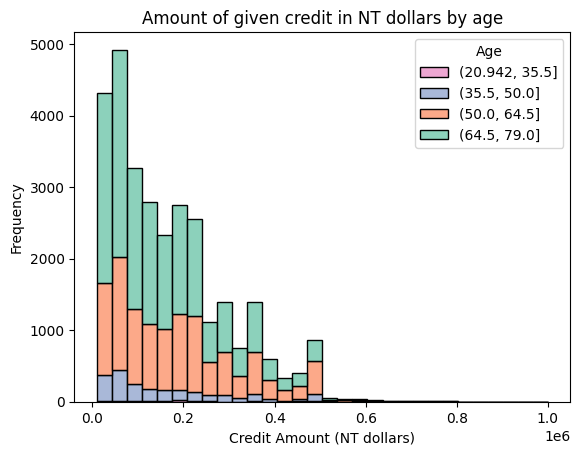

In [26]:
sns.histplot(data=df, x="LIMIT_BAL", bins=30, hue=pd.cut(df['AGE'], bins=4), multiple="stack", palette="Set2")
plt.title('Amount of given credit in NT dollars by age')
plt.xlabel('Credit Amount (NT dollars)')
plt.ylabel('Frequency')
plt.legend(title='Age', labels=['(20.942, 35.5]', '(35.5, 50.0]', '(50.0, 64.5]', '(64.5, 79.0]'])
plt.show()

In [27]:
df['AGE_SPLIT'] = pd.cut(df['AGE'], bins=4)

In [28]:
cols = df['AGE_SPLIT'].unique()

total_counts = {}
default_counts = {}

for i in cols:
    total_counts[i] = df[df['AGE_SPLIT'] == i].shape[0]
    default_counts[i] = df[(df['AGE_SPLIT'] == i) & (df['default payment next month'] == 1)].shape[0]
    percentage = (default_counts[i] / total_counts[i]) * 100 if total_counts[i] > 0 else 0
    print(f'Percentage of {i} who are late with payments: {percentage:.2f}%')

Percentage of (20.942, 35.5] who are late with payments: 21.40%
Percentage of (35.5, 50.0] who are late with payments: 22.54%
Percentage of (50.0, 64.5] who are late with payments: 25.43%
Percentage of (64.5, 79.0] who are late with payments: 25.45%


No found outliers

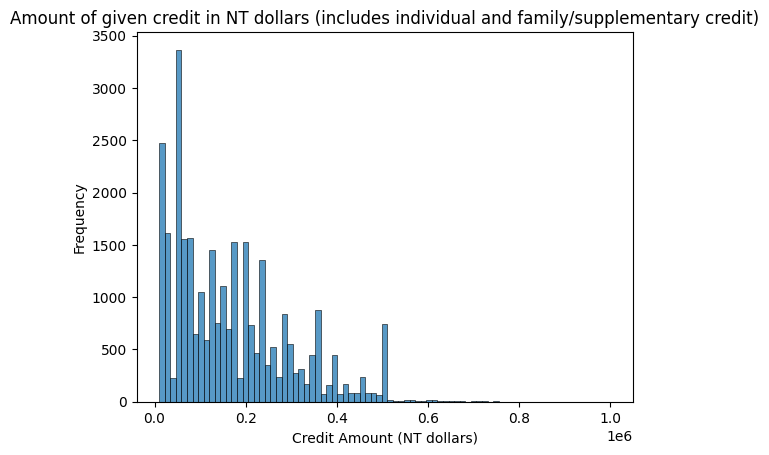

In [29]:
sns.histplot(data=df, x="LIMIT_BAL")
plt.title('Amount of given credit in NT dollars (includes individual and family/supplementary credit)')
plt.xlabel('Credit Amount (NT dollars)')
plt.ylabel('Frequency')
plt.show()

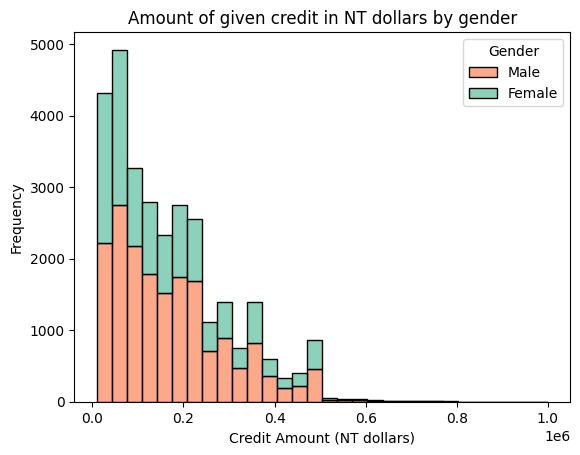

In [30]:
sns.histplot(data=df, x="LIMIT_BAL", bins=30, hue="SEX", multiple="stack", palette="Set2")
plt.title('Amount of given credit in NT dollars by gender')
plt.xlabel('Credit Amount (NT dollars)')
plt.ylabel('Frequency')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

women are given larger credit amount

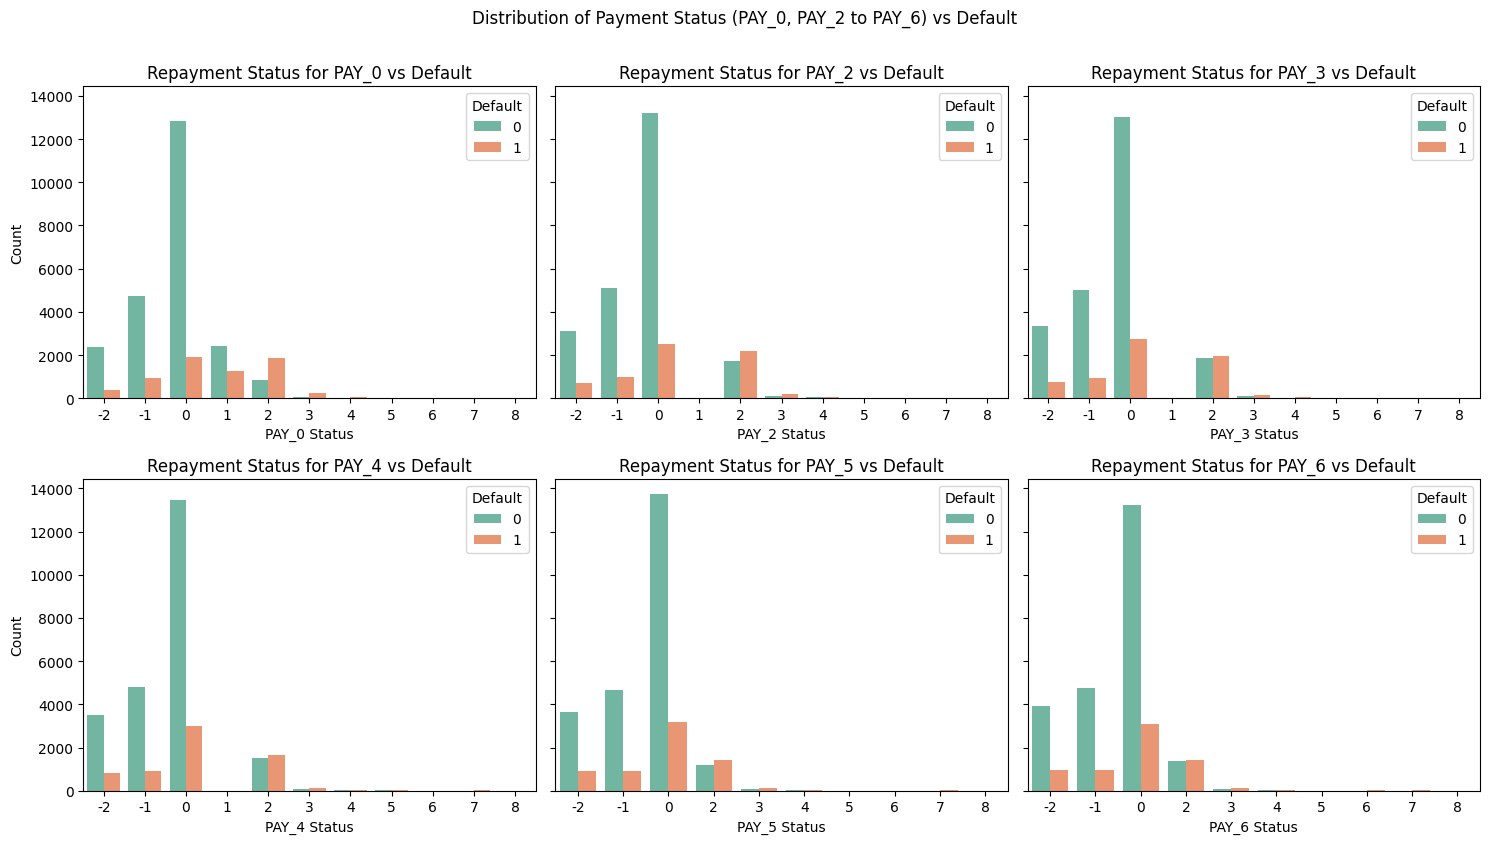

In [31]:
pay_cols = ['PAY_0'] + ['PAY_' + str(i) for i in range(2, 7)]

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

# Побудова графіків
for idx, col in enumerate(pay_cols):
    sns.countplot(data=df, x=col, hue='default payment next month', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Repayment Status for {col} vs Default')
    axes[idx].set_xlabel(f'{col} Status')
    axes[idx].set_ylabel('Count')
    axes[idx].legend(title='Default')

# Видалення зайвих осей
for idx in range(len(pay_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.suptitle('Distribution of Payment Status (PAY_0, PAY_2 to PAY_6) vs Default', y=1.05)
plt.show()

/tmp/ipython-input-1798689680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PAY_0', y='default payment next month', data=mean_default_by_pay0, palette='Set2')


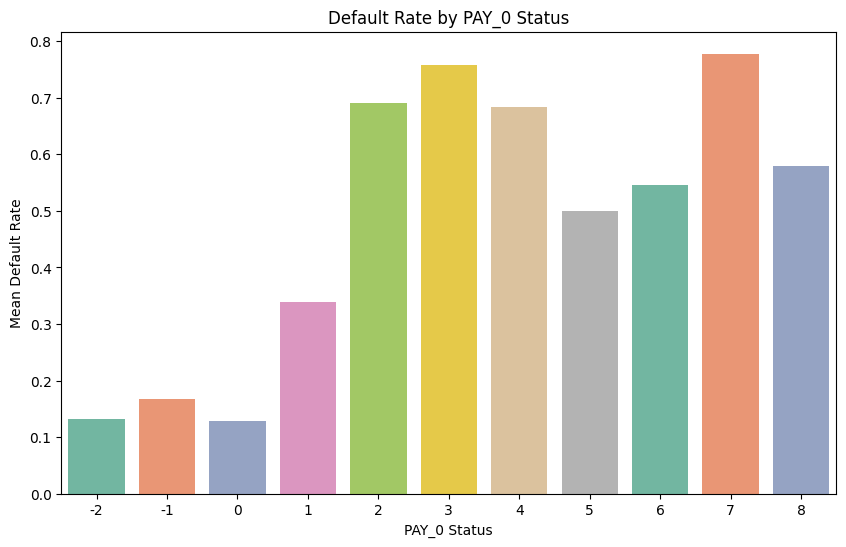

In [32]:
mean_default_by_pay0 = df.groupby('PAY_0')['default payment next month'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PAY_0', y='default payment next month', data=mean_default_by_pay0, palette='Set2')
plt.title('Default Rate by PAY_0 Status')
plt.xlabel('PAY_0 Status')
plt.ylabel('Mean Default Rate')
plt.show()

In [33]:
mean_default_by_pay0

,PAY_0,default payment next month
0,-2,0.132294
1,-1,0.167781
2,0,0.128113
3,1,0.339479
4,2,0.691414
5,3,0.757764
6,4,0.684211
7,5,0.500000
8,6,0.545455
9,7,0.777778


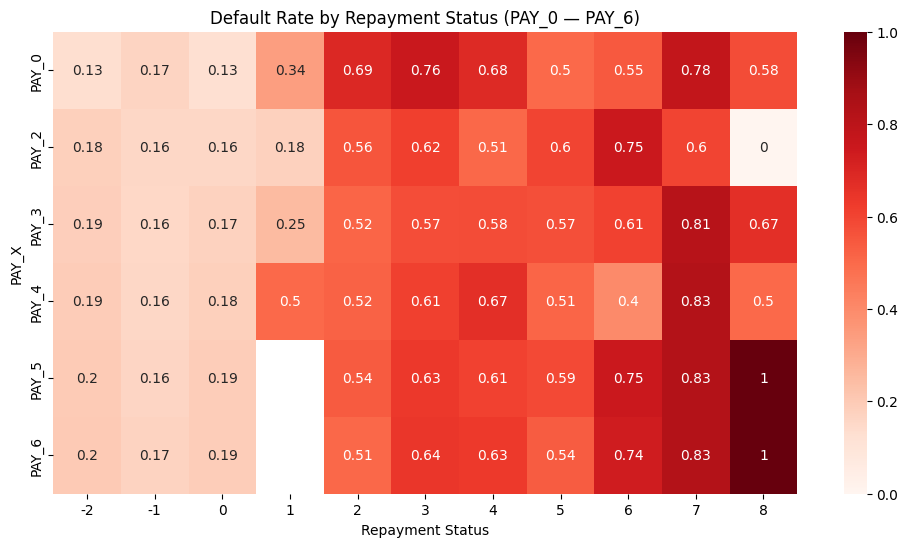

In [34]:
pivot_data = pd.DataFrame()

for col in pay_cols:
    pivot_data[col] = df.groupby(col)['default payment next month'].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data.T, annot=True, cmap='Reds')
plt.title('Default Rate by Repayment Status (PAY_0 — PAY_6)')
plt.xlabel('Repayment Status')
plt.ylabel('PAY_X')
plt.show()

An analysis of delinquencies over the past six months showed a clear link between repayment and default risk.

Customers with delinquencies of two months or more show an average 50-80% probability of default, making this group the main source of risk for the bank.

In [35]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr_mat = df[num_cols].corr()
corr_mat[corr_mat['default payment next month'] > 0.1]['default payment next month']

,default payment next month
PAY_0,0.324794
PAY_2,0.263551
PAY_3,0.235253
PAY_4,0.216614
PAY_5,0.204149
PAY_6,0.186866
default payment next month,1.000000


Correlation analysis confirms that recent repayment delays (especially PAY_0) are the strongest predictors of credit default.
Clients with recent delays show a moderate positive correlation with the risk of default (up to 0.32), while earlier delays have a decreasing but still notable influence.

In [36]:
corr_mat[corr_mat['default payment next month'] < -0.1]['default payment next month']

,default payment next month
LIMIT_BAL,-0.15352


negative correlation of LIMIT_BAL suggests the feature may lower the risk of default

In [37]:
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
target_col = 'default payment next month'

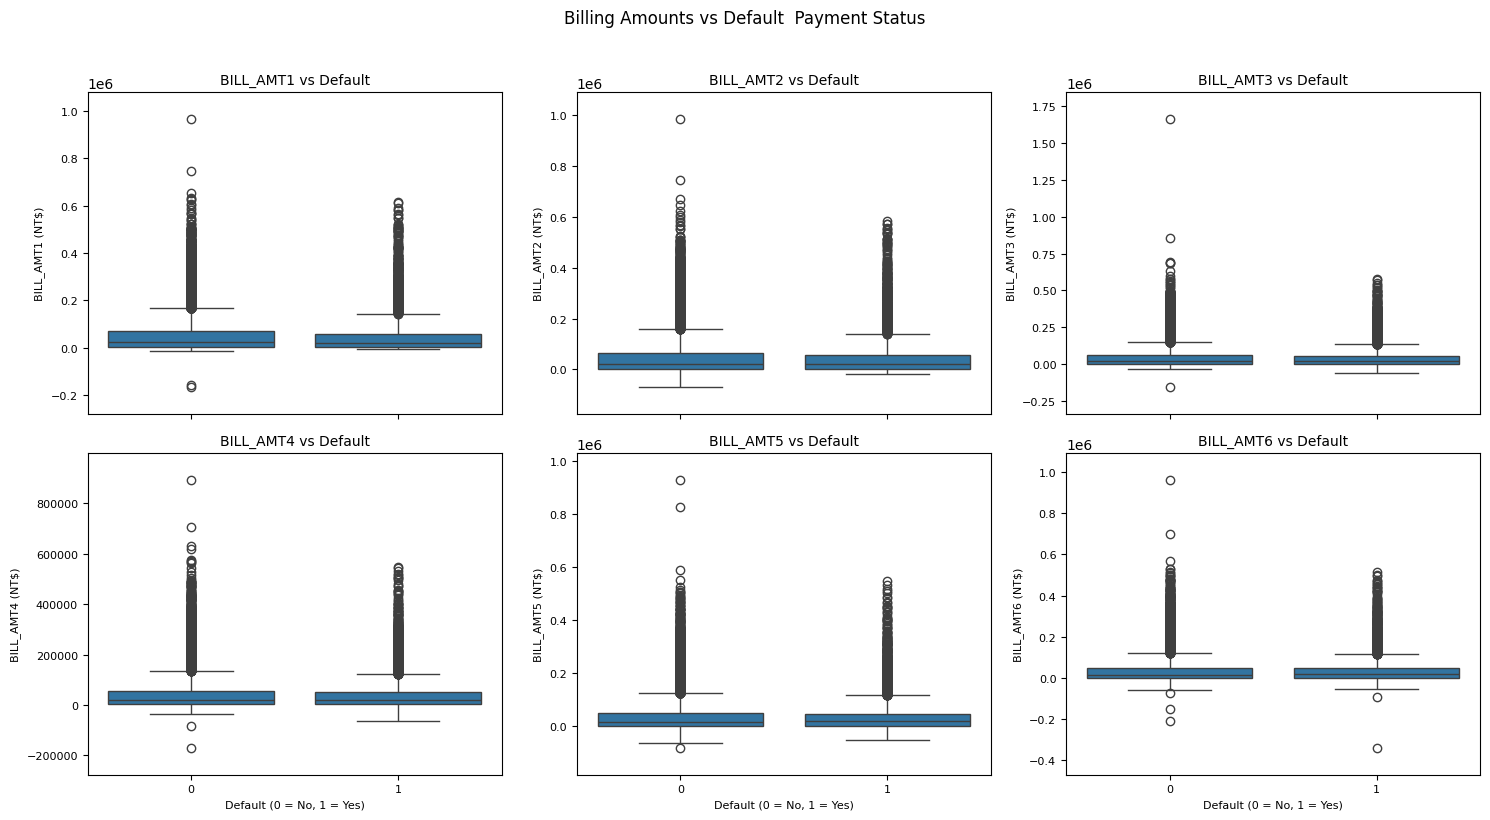

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8),sharex=True)
axes = axes.flatten()

for idx, col in enumerate(bill_cols):
  data_min = df[col].min()
  data_max = df[col].max()
  padding = (data_max - data_min) * 0.1
  y_min = data_min - padding
  y_max = data_max + padding

  sns.boxplot(x=target_col,y=col,data=df,ax=axes[idx])

  axes[idx].set_title(f'{col} vs Default',fontsize=10)
  axes[idx].set_xlabel('Default (0 = No, 1 = Yes)', fontsize=8)
  axes[idx].set_ylabel(f'{col} (NT$)', fontsize=8)
  axes[idx].set_ylim(y_min, y_max)
  axes[idx].tick_params(axis='both', labelsize=8)

plt.suptitle('Billing Amounts vs Default  Payment Status',fontsize = 12,y=1.02)
plt.tight_layout()
plt.show()

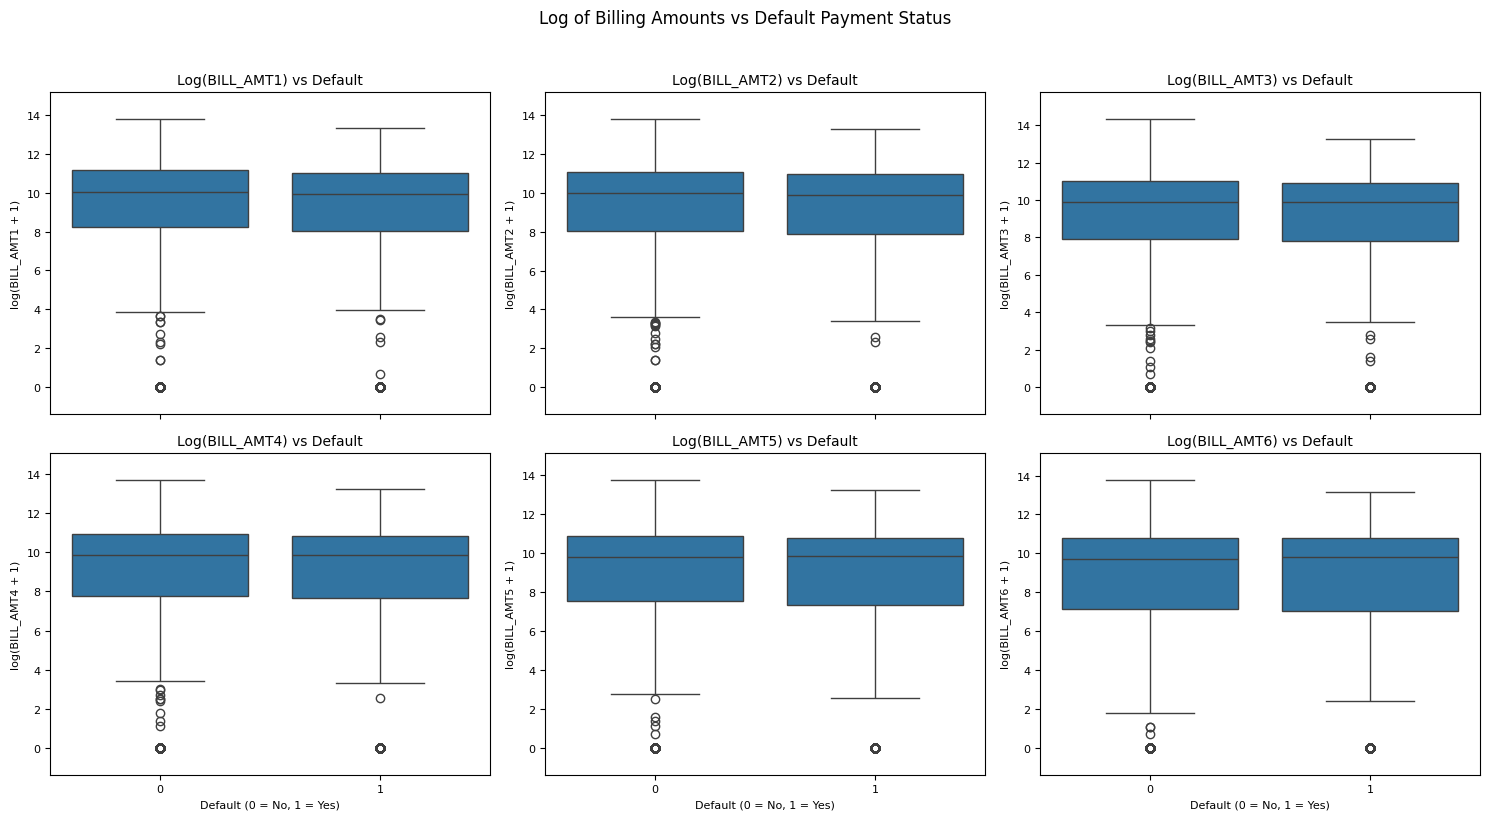

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=True)
axes = axes.flatten()

for idx, col in enumerate(bill_cols):
    df[f'log_{col}'] = np.log1p(df[col].clip(lower=0))

    valid_data = df[f'log_{col}'].replace([np.inf, -np.inf], np.nan).dropna()

    data_min = df[f'log_{col}'].min()
    data_max = df[f'log_{col}'].max()
    padding = (data_max - data_min) * 0.1
    y_min = data_min - padding
    y_max = data_max + padding

    sns.boxplot(x=target_col, y=f'log_{col}', data=df, ax=axes[idx])

    axes[idx].set_title(f'Log({col}) vs Default', fontsize=10)
    axes[idx].set_xlabel('Default (0 = No, 1 = Yes)', fontsize=8)
    axes[idx].set_ylabel(f'log({col} + 1)', fontsize=8)
    axes[idx].set_ylim(y_min, y_max)
    axes[idx].tick_params(axis='both', labelsize=8)

plt.suptitle('Log of Billing Amounts vs Default Payment Status', fontsize=12, y=1.02)
plt.tight_layout()
plt.show()


In [40]:
pay_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

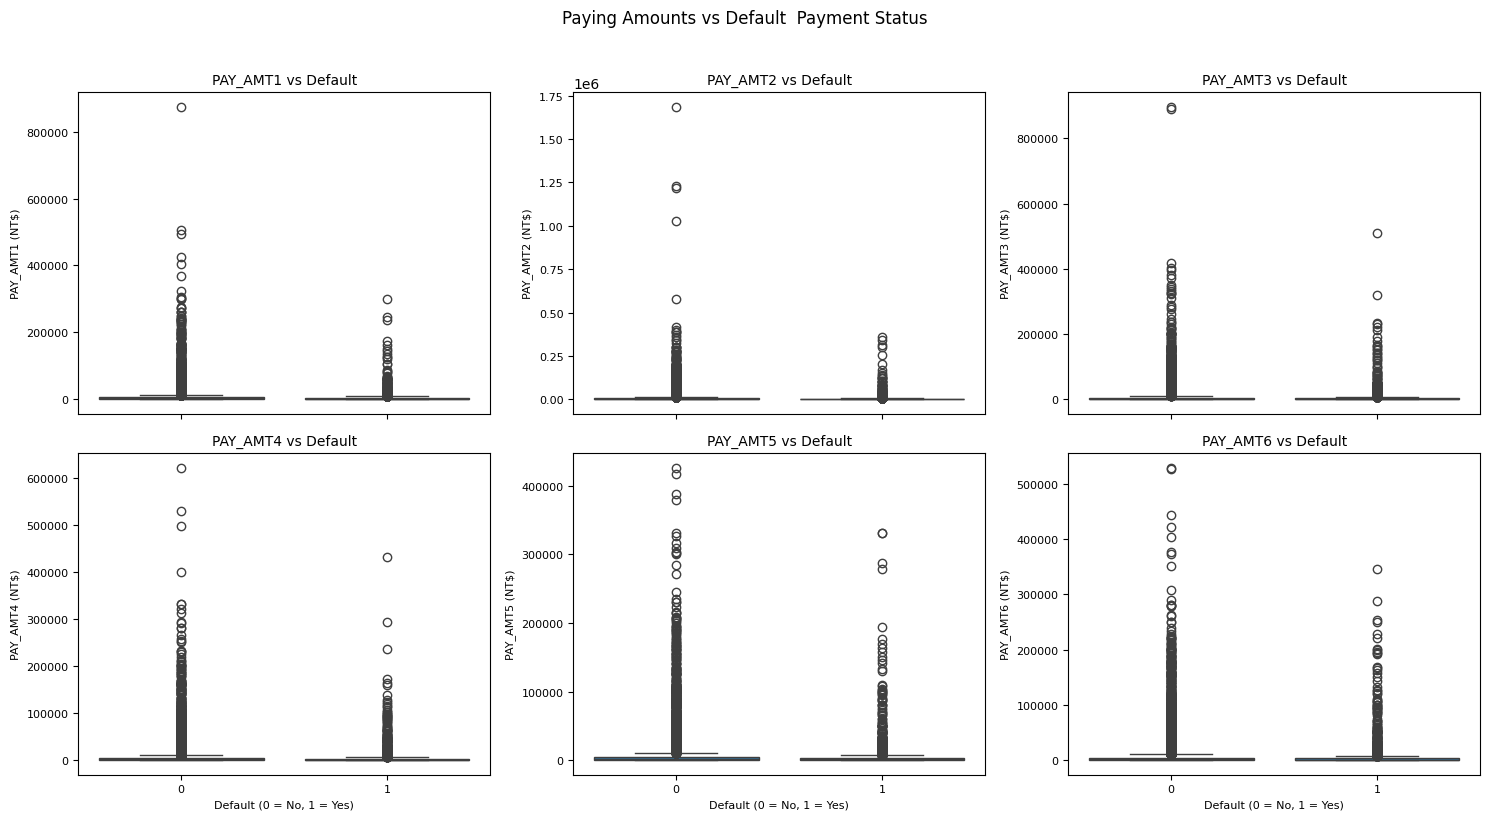

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8),sharex=True)
axes = axes.flatten()

for idx, col in enumerate(pay_cols):
  sns.boxplot(x=target_col,y=col,data=df,ax=axes[idx])

  axes[idx].set_title(f'{col} vs Default',fontsize=10)
  axes[idx].set_xlabel('Default (0 = No, 1 = Yes)', fontsize=8)
  axes[idx].set_ylabel(f'{col} (NT$)', fontsize=8)
  axes[idx].tick_params(axis='both', labelsize=8)

plt.suptitle('Paying Amounts vs Default  Payment Status',fontsize = 12,y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-768373103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=f'log_{col}', data=df, ax=axes[idx], palette='colorblind')
/tmp/ipython-input-768373103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=f'log_{col}', data=df, ax=axes[idx], palette='colorblind')
/tmp/ipython-input-768373103.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=f'log_{col}', data=df, ax=axes[idx], palette='colorblind')
/tmp/ipython-input-768373103.py:7: FutureWarning: 

Passing `palette` without a

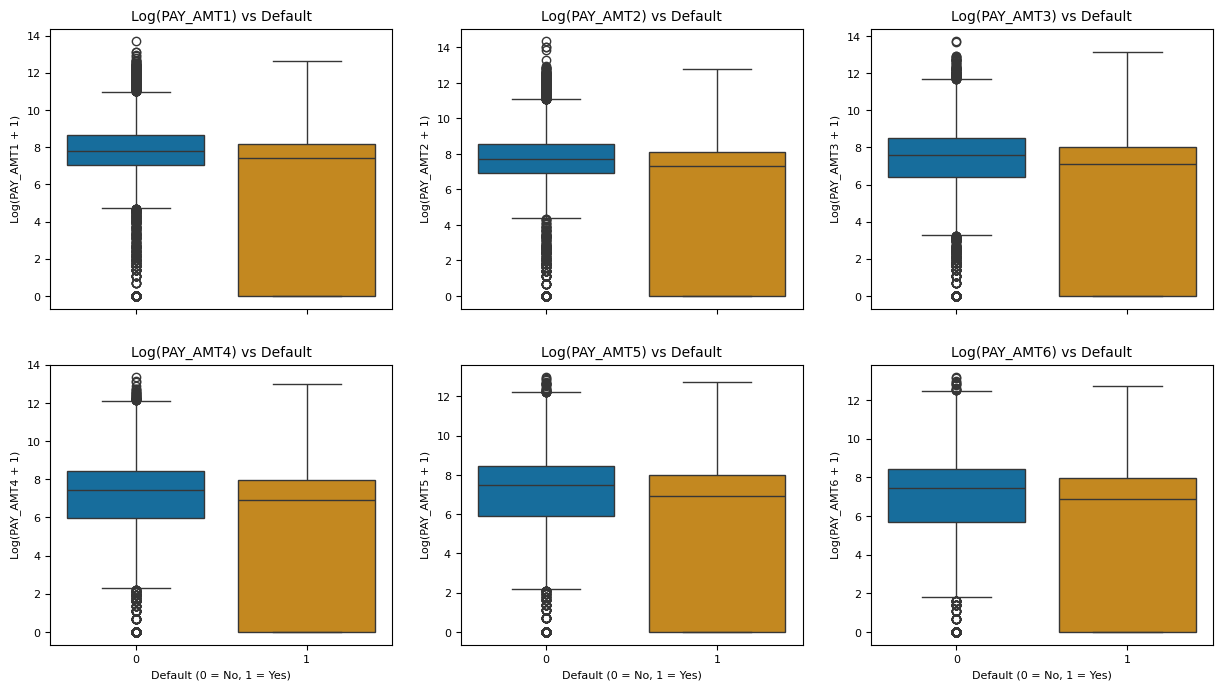

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=True)
axes = axes.flatten()

for idx, col in enumerate(pay_cols):

    df[f'log_{col}'] = np.log1p(df[col])
    sns.boxplot(x=target_col, y=f'log_{col}', data=df, ax=axes[idx], palette='colorblind')

    axes[idx].set_title(f'Log({col}) vs Default', fontsize=10)
    axes[idx].set_xlabel('Default (0 = No, 1 = Yes)', fontsize=8)
    axes[idx].set_ylabel(f'Log({col} + 1)', fontsize=8)
    axes[idx].tick_params(axis='both', labelsize=8)

Customers who default tend to make significantly lower payments across all observed months.
The median of log(PAY_AMT) for defaulting clients is consistently lower compared to non-defaulters.
This suggests that lower historical payments could be a risk factor for future default

/tmp/ipython-input-3739485601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, palette='Set2')


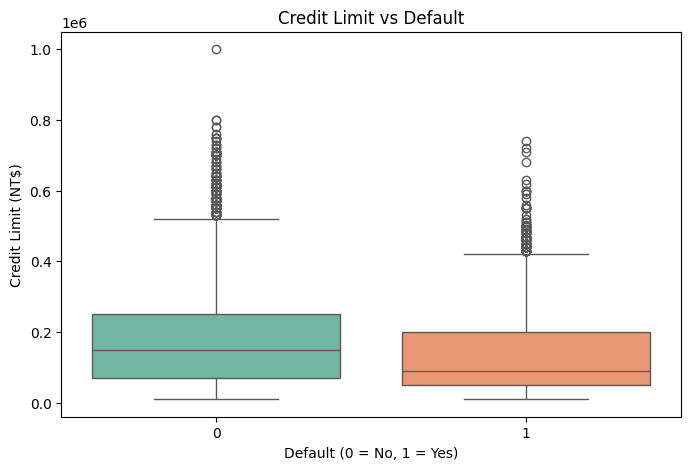

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df, palette='Set2')
plt.title('Credit Limit vs Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Credit Limit (NT$)')
plt.show()

Difference is not huge,should investigate more

<Axes: xlabel='default payment next month', ylabel='log_LIMIT_BAL'>

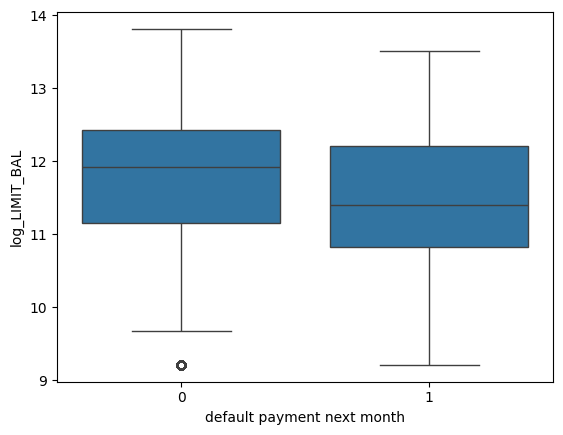

In [44]:
df['log_LIMIT_BAL'] = np.log1p(df['LIMIT_BAL'])
sns.boxplot(x='default payment next month', y='log_LIMIT_BAL', data=df)

after log,the difference is more significant

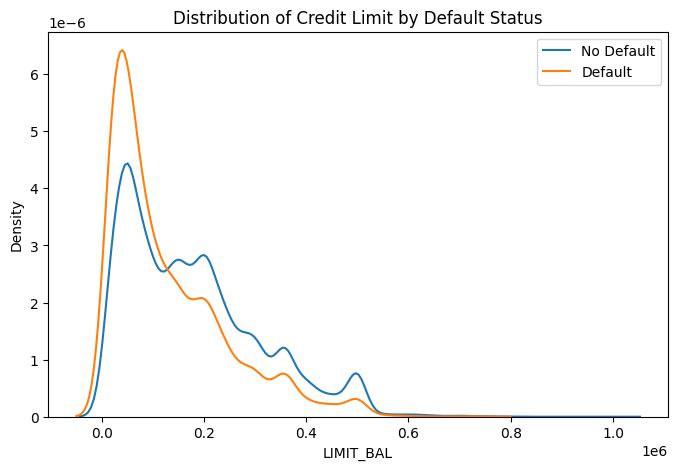

In [45]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['default payment next month'] == 0]['LIMIT_BAL'], label='No Default')
sns.kdeplot(df[df['default payment next month'] == 1]['LIMIT_BAL'], label='Default')
plt.legend()
plt.title('Distribution of Credit Limit by Default Status')
plt.show()


**How does the history of delinquencies (PAY\_0…PAY\_6) affect the risk of default?**

> A clear positive relationship was found:
> Customers with delinquencies of **two months or more** have a **50–80% probability of default**.
> These customers represent the primary risk group for the bank.

---

**Does the probability of default increase with the number of months of delinquency?**

> Yes. The risk of default **increases proportionally with the number of months past due**.
> The longer the delay, the higher the observed default rate.

---

**Does the credit limit (LIMIT\_BAL) affect the probability of default?**

> Yes. Customers with **lower credit limits** tend to default more often.
> This suggests risk-based credit limit assignment may be justified.

---

**Does the amount of debt (BILL\_AMT1…6) affect default?**

> Interestingly, customers with **higher total debt amounts** are **less likely to default**.
> Likely because higher-debt customers maintain better credit standing or have stricter monitoring.

---

**Does the amount of payments (PAY\_AMT1…6) affect the risk of default?**

> Yes. **Higher historical payments reduce the risk of default.**
> Defaulters tend to make **lower payments consistently**.
> For non-defaulters, payment amounts increase towards the last two months, possibly showing proactive repayment behavior.

---

**What role does age (AGE) play in default risk?**

> Slight increase in default risk with age, but **not statistically significant**.
> Data for older clients (65+) is limited, so conclusions are tentative.

---

**How do socio-demographic factors (SEX, EDUCATION, MARRIAGE) affect default?**

* **Men** are **4% more likely** to default than women
* **Married clients** have a **3% higher risk** of default than single clients
* **Higher education** correlates with **lower risk** (up to **6% difference** between graduate school and high school)

---

**Is there a strong correlation between factors (multicollinearity)?**

> Strong correlation observed between **bill amounts and payments**.
> Among all variables, **payment amounts (PAY\_AMT) have the strongest correlation with default**.


